In [99]:
import torch

In [100]:
print(torch.__version__)

2.3.1


In [73]:
import urllib.request

url = 'https://pytorch.tips/coffee'
fpath= 'coffee.png'
urllib.request.urlretrieve(url, fpath)

('coffee.png', <http.client.HTTPMessage at 0x30fe0ac50>)

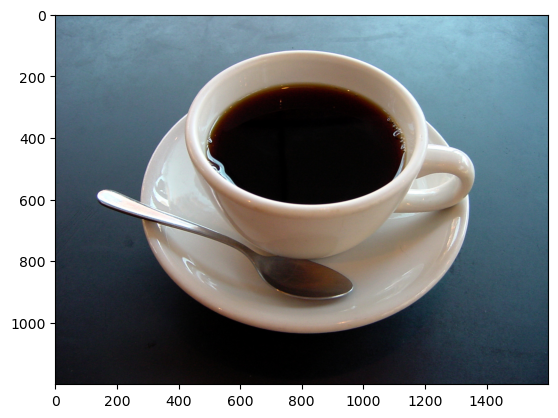

In [74]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open(fpath)
plt.imshow(img)

## Pre Process the images

In [75]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

img_transform = transform(img)
print(img_transform)

tensor([[[-0.1143, -0.1143, -0.0972,  ...,  0.3823,  0.4337,  0.4679],
         [-0.0972, -0.1314, -0.1486,  ...,  0.3823,  0.4166,  0.3994],
         [-0.1486, -0.1486, -0.1657,  ...,  0.3823,  0.4166,  0.3994],
         ...,
         [-1.8097, -1.8097, -1.7925,  ..., -1.6042, -1.5357, -1.5357],
         [-1.7754, -1.7754, -1.7583,  ..., -1.4843, -1.4500, -1.5528],
         [-1.7925, -1.7925, -1.7754,  ..., -1.4843, -1.5014, -1.5185]],

        [[ 0.5728,  0.6078,  0.5903,  ...,  1.3957,  1.4482,  1.4482],
         [ 0.5553,  0.5728,  0.5553,  ...,  1.3957,  1.4132,  1.3957],
         [ 0.5553,  0.5203,  0.5028,  ...,  1.3957,  1.4307,  1.4132],
         ...,
         [-1.7031, -1.7031, -1.7381,  ..., -1.1253, -1.1253, -1.1078],
         [-1.7206, -1.7031, -1.7381,  ..., -1.1954, -1.1779, -1.1954],
         [-1.7031, -1.7206, -1.7381,  ..., -1.1429, -1.1779, -1.2479]],

        [[ 1.0888,  1.1237,  1.1411,  ...,  1.9428,  1.9951,  2.0125],
         [ 1.0714,  1.0714,  1.0365,  ...,  1

<PIL.Image.Image image mode=RGB size=224x224 at 0x31DFD6080>


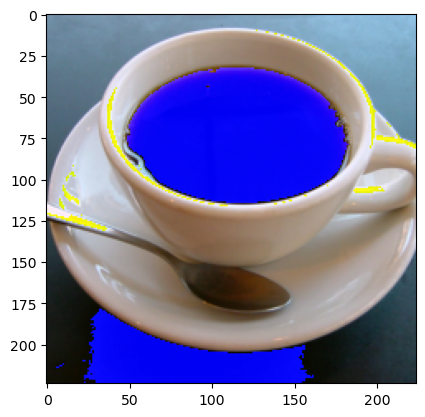

In [76]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
    std=[1/0.229, 1/0.224, 1/0.255]
)
inv_tensor = transforms.ToPILImage()
img_T = inv_tensor(inv_normalize(img_transform))
plt.imshow(img_T)
print(img_T)

In [77]:
batch = img_transform.unsqueeze(0)
print(batch)
print(batch.shape)

tensor([[[[-0.1143, -0.1143, -0.0972,  ...,  0.3823,  0.4337,  0.4679],
          [-0.0972, -0.1314, -0.1486,  ...,  0.3823,  0.4166,  0.3994],
          [-0.1486, -0.1486, -0.1657,  ...,  0.3823,  0.4166,  0.3994],
          ...,
          [-1.8097, -1.8097, -1.7925,  ..., -1.6042, -1.5357, -1.5357],
          [-1.7754, -1.7754, -1.7583,  ..., -1.4843, -1.4500, -1.5528],
          [-1.7925, -1.7925, -1.7754,  ..., -1.4843, -1.5014, -1.5185]],

         [[ 0.5728,  0.6078,  0.5903,  ...,  1.3957,  1.4482,  1.4482],
          [ 0.5553,  0.5728,  0.5553,  ...,  1.3957,  1.4132,  1.3957],
          [ 0.5553,  0.5203,  0.5028,  ...,  1.3957,  1.4307,  1.4132],
          ...,
          [-1.7031, -1.7031, -1.7381,  ..., -1.1253, -1.1253, -1.1078],
          [-1.7206, -1.7031, -1.7381,  ..., -1.1954, -1.1779, -1.1954],
          [-1.7031, -1.7206, -1.7381,  ..., -1.1429, -1.1779, -1.2479]],

         [[ 1.0888,  1.1237,  1.1411,  ...,  1.9428,  1.9951,  2.0125],
          [ 1.0714,  1.0714,  

In [78]:
from torchvision import models

model = models.alexnet(pretrained=True)

In [79]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [80]:
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [81]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [82]:
y = model(batch.to(device))
print(y.shape)

torch.Size([1, 1000])


In [85]:
y_max, index = torch.max(y, 1)
print(y_max, index)

tensor([22.8618], grad_fn=<MaxBackward0>) tensor([967])


In [91]:
import json
url_label = 'https://pytorch.tips/imagenet-labels'

fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url_label, fpath)
with open('imagenet_class_labels.txt') as f:
    classes = [line.strip() for line in f.readlines()]

    
class_dict = {i: class_name for i, class_name in enumerate(classes)}

# Print the dictionary in a pretty format
print(json.dumps(class_dict, indent=4))


{
    "0": "{0: 'tench, Tinca tinca',",
    "1": "1: 'goldfish, Carassius auratus',",
    "2": "2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
    "3": "3: 'tiger shark, Galeocerdo cuvieri',",
    "4": "4: 'hammerhead, hammerhead shark',",
    "5": "5: 'electric ray, crampfish, numbfish, torpedo',",
    "6": "6: 'stingray',",
    "7": "7: 'cock',",
    "8": "8: 'hen',",
    "9": "9: 'ostrich, Struthio camelus',",
    "10": "10: 'brambling, Fringilla montifringilla',",
    "11": "11: 'goldfinch, Carduelis carduelis',",
    "12": "12: 'house finch, linnet, Carpodacus mexicanus',",
    "13": "13: 'junco, snowbird',",
    "14": "14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',",
    "15": "15: 'robin, American robin, Turdus migratorius',",
    "16": "16: 'bulbul',",
    "17": "17: 'jay',",
    "18": "18: 'magpie',",
    "19": "19: 'chickadee',",
    "20": "20: 'water ouzel, dipper',",
    "21": "21: 'kite',",
    "22": "22: 'ba

In [92]:
print(classes[967])

967: 'espresso',


## using torch.softmax() to convert output values to probabilities

In [96]:
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
print(classes[index[0]], prob[index[0]].item())

967: 'espresso', 87.99555969238281


In [98]:
_, indices = torch.sort(y, descending = True)
for idx in indices[0][:10]:
    print(classes[idx], prob[idx].item())

967: 'espresso', 87.99555969238281
968: 'cup', 7.688907623291016
504: 'coffee mug', 3.861560583114624
925: 'consomme', 0.35129523277282715
960: 'chocolate sauce, chocolate syrup', 0.050077494233846664
809: 'soup bowl', 0.01795845478773117
700: 'paper towel', 0.012998687103390694
999: 'toilet tissue, toilet paper, bathroom tissue'} 0.0041354261338710785
849: 'teapot', 0.003109623910859227
725: 'pitcher, ewer', 0.0021426561288535595
